# Daily Weather Data EDA and Initial Analysis

<b>Importing important packages, getting a view of data</b>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("daily_weather_data.csv")
df.head(10)

,date,temperature_2m_mean,temperature_2m_min,temperature_2m_max,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunset,sunrise,precipitation_sum,precipitation_hours,daylight_duration,sunshine_duration,snowfall_sum,rain_sum,wind_gusts_10m_max,wind_speed_10m_max,weather_code
0,2025-02-01 18:00:00+00:00,-16.358747,-24.865000,-4.315,-8.109735,-29.313883,-20.641008,0,0,0.000000,0,36561.870,32951.273,0.000000,0.0,21.960000,2.968636,0
1,2025-01-31 18:00:00+00:00,-13.198334,-19.715000,-7.715,-11.789309,-24.011051,-17.289139,0,0,1.500000,7,36427.730,31965.623,1.050000,0.0,20.880001,5.220000,73
2,2025-01-30 18:00:00+00:00,-12.139999,-12.964999,-11.315,-15.700456,-17.144306,-16.357079,0,0,9.099999,24,36295.810,0.000,6.370000,0.0,41.399998,8.161764,73
3,2025-01-29 18:00:00+00:00,-11.069167,-12.415000,-9.315,-13.592699,-16.258812,-15.016267,0,0,6.900000,24,36166.297,9807.753,4.830001,0.0,33.120000,6.287130,73
4,2025-01-28 18:00:00+00:00,-10.415000,-13.615000,-7.715,-11.776155,-17.368916,-14.186333,0,0,2.200000,14,36039.367,23790.768,1.540000,0.0,22.680000,5.043213,73
5,2025-01-27 18:00:00+00:00,-11.679584,-19.865000,-2.365,-6.063425,-24.336895,-15.752027,0,0,0.000000,0,35915.195,19649.994,0.000000,0.0,26.280000,3.931259,3
6,2025-01-26 18:00:00+00:00,-11.252500,-17.015001,-3.915,-7.806339,-21.249630,-15.372131,0,0,0.000000,0,35793.980,31573.176,0.000000,0.0,15.119999,2.052316,3
7,2025-01-25 18:00:00+00:00,-13.571251,-22.565000,-2.815,-6.949559,-27.157314,-18.073456,0,0,0.000000,0,35675.387,31724.127,0.000000,0.0,41.399998,7.538541,3
8,2025-01-24 18:00:00+00:00,-16.673336,-24.615000,-7.015,-12.049147,-29.670412,-21.719221,0,0,0.000000,0,35558.277,31694.068,0.000000,0.0,52.920000,8.863972,1
9,2025-01-23 18:00:00+00:00,-20.079586,-31.315000,-9.665,-14.376066,-36.093990,-24.687738,0,0,0.000000,0,35442.740,31494.945,0.000000,0.0,36.000000,5.840993,2


<b>Initial Observations:
<ul><li><u>Redundant Columns:</u> Can most likely remove some unnecessary fields to avoid redundancy and collinearity: sunset, sunrise, weather_code</li>
    </ul></b>

<b>Preliminary Data Analysis</b>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10543 entries, 0 to 10542
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       10543 non-null  object 
 1   temperature_2m_mean        10543 non-null  float64
 2   temperature_2m_min         10543 non-null  float64
 3   temperature_2m_max         10543 non-null  float64
 4   apparent_temperature_max   10543 non-null  float64
 5   apparent_temperature_min   10543 non-null  float64
 6   apparent_temperature_mean  10543 non-null  float64
 7   sunset                     10543 non-null  int64  
 8   sunrise                    10543 non-null  int64  
 9   precipitation_sum          10543 non-null  float64
 10  precipitation_hours        10543 non-null  int64  
 11  daylight_duration          10543 non-null  float64
 12  sunshine_duration          10543 non-null  float64
 13  snowfall_sum               10543 non-null  flo

Date column needs to be transformed to datetime data type

In [19]:
df.shape

(10543, 18)

Dataset has ~10k rows with 18 columns

<b>Data Transformations</b>

In [12]:
# Delete redundant columns
df.drop(columns=['sunset','sunrise','weather_code'])

,date,temperature_2m_mean,temperature_2m_min,temperature_2m_max,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,precipitation_hours,daylight_duration,sunshine_duration,snowfall_sum,rain_sum,wind_gusts_10m_max,wind_speed_10m_max
0,2025-02-01 18:00:00+00:00,-16.358747,-24.865000,-4.315,-8.109735,-29.313883,-20.641008,0.000000,0,36561.870,32951.273,0.000000,0.0,21.960000,2.968636
1,2025-01-31 18:00:00+00:00,-13.198334,-19.715000,-7.715,-11.789309,-24.011051,-17.289139,1.500000,7,36427.730,31965.623,1.050000,0.0,20.880001,5.220000
2,2025-01-30 18:00:00+00:00,-12.139999,-12.964999,-11.315,-15.700456,-17.144306,-16.357079,9.099999,24,36295.810,0.000,6.370000,0.0,41.399998,8.161764
3,2025-01-29 18:00:00+00:00,-11.069167,-12.415000,-9.315,-13.592699,-16.258812,-15.016267,6.900000,24,36166.297,9807.753,4.830001,0.0,33.120000,6.287130
4,2025-01-28 18:00:00+00:00,-10.415000,-13.615000,-7.715,-11.776155,-17.368916,-14.186333,2.200000,14,36039.367,23790.768,1.540000,0.0,22.680000,5.043213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10538,1996-03-27 18:00:00+00:00,-5.585417,-8.075000,-4.175,-7.063973,-11.649003,-9.098434,7.799999,21,45014.934,31566.473,5.460001,0.0,37.800000,6.618519
10539,1996-03-26 18:00:00+00:00,-2.420833,-5.325000,2.425,-0.541187,-9.915210,-6.117577,14.200000,14,44851.375,13893.902,9.869999,0.1,39.239998,8.557102
10540,1996-03-25 18:00:00+00:00,-2.904167,-9.975000,4.475,2.154680,-14.249048,-6.752101,0.000000,0,44687.860,41520.027,0.000000,0.0,34.560000,8.225035
10541,1996-03-24 18:00:00+00:00,-4.743750,-7.425000,-1.325,-3.579060,-10.965820,-8.049184,11.000003,17,44524.490,27308.050,7.700000,0.0,40.320000,5.001280


In [27]:
# Change to datetime dtype
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S+00:00')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10543 entries, 0 to 10542
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       10543 non-null  datetime64[ns]
 1   temperature_2m_mean        10543 non-null  float64       
 2   temperature_2m_min         10543 non-null  float64       
 3   temperature_2m_max         10543 non-null  float64       
 4   apparent_temperature_max   10543 non-null  float64       
 5   apparent_temperature_min   10543 non-null  float64       
 6   apparent_temperature_mean  10543 non-null  float64       
 7   sunset                     10543 non-null  int64         
 8   sunrise                    10543 non-null  int64         
 9   precipitation_sum          10543 non-null  float64       
 10  precipitation_hours        10543 non-null  int64         
 11  daylight_duration          10543 non-null  float64       
 12  suns

In [29]:
# Add 'Week Ending' Field
df['Week Ending'] = df['date'] + pd.to_timedelta(6 - df['date'].dt.weekday, unit='D')

In [33]:
df.head(20)

,date,temperature_2m_mean,temperature_2m_min,temperature_2m_max,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunset,sunrise,precipitation_sum,precipitation_hours,daylight_duration,sunshine_duration,snowfall_sum,rain_sum,wind_gusts_10m_max,wind_speed_10m_max,weather_code,Week Ending
0,2025-02-01 18:00:00,-16.358747,-24.865000,-4.315000,-8.109735,-29.313883,-20.641008,0,0,0.000000,0,36561.870,32951.27300,0.000000,0.0,21.960000,2.968636,0,2025-02-02 18:00:00
1,2025-01-31 18:00:00,-13.198334,-19.715000,-7.715000,-11.789309,-24.011051,-17.289139,0,0,1.500000,7,36427.730,31965.62300,1.050000,0.0,20.880001,5.220000,73,2025-02-02 18:00:00
2,2025-01-30 18:00:00,-12.139999,-12.964999,-11.315000,-15.700456,-17.144306,-16.357079,0,0,9.099999,24,36295.810,0.00000,6.370000,0.0,41.399998,8.161764,73,2025-02-02 18:00:00
3,2025-01-29 18:00:00,-11.069167,-12.415000,-9.315000,-13.592699,-16.258812,-15.016267,0,0,6.900000,24,36166.297,9807.75300,4.830001,0.0,33.120000,6.287130,73,2025-02-02 18:00:00
4,2025-01-28 18:00:00,-10.415000,-13.615000,-7.715000,-11.776155,-17.368916,-14.186333,0,0,2.200000,14,36039.367,23790.76800,1.540000,0.0,22.680000,5.043213,73,2025-02-02 18:00:00
5,2025-01-27 18:00:00,-11.679584,-19.865000,-2.365000,-6.063425,-24.336895,-15.752027,0,0,0.000000,0,35915.195,19649.99400,0.000000,0.0,26.280000,3.931259,3,2025-02-02 18:00:00
6,2025-01-26 18:00:00,-11.252500,-17.015001,-3.915000,-7.806339,-21.249630,-15.372131,0,0,0.000000,0,35793.980,31573.17600,0.000000,0.0,15.119999,2.052316,3,2025-01-26 18:00:00
7,2025-01-25 18:00:00,-13.571251,-22.565000,-2.815000,-6.949559,-27.157314,-18.073456,0,0,0.000000,0,35675.387,31724.12700,0.000000,0.0,41.399998,7.538541,3,2025-01-26 18:00:00
8,2025-01-24 18:00:00,-16.673336,-24.615000,-7.015000,-12.049147,-29.670412,-21.719221,0,0,0.000000,0,35558.277,31694.06800,0.000000,0.0,52.920000,8.863972,1,2025-01-26 18:00:00
9,2025-01-23 18:00:00,-20.079586,-31.315000,-9.665000,-14.376066,-36.093990,-24.687738,0,0,0.000000,0,35442.740,31494.94500,0.000000,0.0,36.000000,5.840993,2,2025-01-26 18:00:00


<b>Weekly Aggregations</b>

In [36]:
# (can alter the aggregating functions as desired)

weekly_agg = df.groupby('Week Ending').agg({
    'temperature_2m_mean': 'mean',
    'temperature_2m_min': 'mean',
    'temperature_2m_max': 'mean',
    'apparent_temperature_max': 'mean',
    'apparent_temperature_min': 'mean',
    'apparent_temperature_mean': 'mean',
    'precipitation_sum': 'sum',
    'precipitation_hours': 'sum',
    'daylight_duration': 'mean',
    'sunshine_duration': 'mean',
    'snowfall_sum': 'sum',
    'rain_sum': 'sum'
}).reset_index()

In [40]:
weekly_agg.head(20)

,Week Ending,temperature_2m_mean,temperature_2m_min,temperature_2m_max,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,precipitation_hours,daylight_duration,sunshine_duration,snowfall_sum,rain_sum
0,1996-03-24 18:00:00,-5.977084,-10.175000,-1.200000,-3.838122,-14.230730,-9.588187,13.200003,24,44442.926500,27577.889500,9.240000,0.000000
1,1996-03-31 18:00:00,-6.054762,-9.746429,-2.289286,-5.064121,-13.846982,-9.766504,42.799998,93,45178.128286,26913.557143,29.889999,0.100000
2,1996-04-07 18:00:00,-7.163095,-10.332143,-3.596429,-6.476683,-14.043396,-10.682218,20.199998,106,46310.994714,30073.274286,14.140001,0.000000
3,1996-04-14 18:00:00,-3.246726,-8.439286,1.803571,-0.455250,-12.322186,-6.541763,33.000002,71,47411.302429,29246.884129,22.609999,0.700000
4,1996-04-21 18:00:00,2.434821,-1.660714,6.575000,5.618499,-4.961793,-0.022045,30.999999,65,48494.699143,35033.104000,14.070000,10.900000
5,1996-04-28 18:00:00,0.625298,-3.403571,4.903571,3.386342,-6.935322,-2.260206,67.499999,88,49537.545857,35823.205857,41.790000,7.800000
6,1996-05-05 18:00:00,-0.577381,-4.010714,2.832143,1.260945,-7.165350,-3.421695,35.000003,93,50514.516714,31886.646857,23.100000,2.000000
7,1996-05-12 18:00:00,0.508036,-4.196429,4.903571,4.114137,-7.527857,-2.045835,16.199999,74,51433.613143,43800.113000,8.749999,3.700000
8,1996-05-19 18:00:00,3.054167,-3.253571,7.810714,7.629833,-6.665621,0.678261,15.699999,38,52260.328286,42368.360757,4.970001,8.599999
9,1996-05-26 18:00:00,5.155952,-0.382143,9.839286,9.484523,-3.421917,3.175444,16.899999,45,52967.649000,42189.271571,1.610000,14.600001


### EDA for Weekly Aggregated Data

In [43]:
weekly_agg.describe(include='all')

,Week Ending,temperature_2m_mean,temperature_2m_min,temperature_2m_max,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,precipitation_hours,daylight_duration,sunshine_duration,snowfall_sum,rain_sum
count,1507,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000
mean,2010-08-29 17:59:59.999999744,-0.352973,-6.023982,5.186814,2.873538,-9.648125,-3.445025,21.082548,40.972130,43953.886827,33683.666905,9.067160,8.482084
min,1996-03-24 18:00:00,-21.855952,-27.322143,-14.317857,-19.050720,-32.313432,-26.821396,0.000000,0.000000,33302.550571,4877.282927,0.000000,0.000000
25%,2003-06-12 06:00:00,-8.202143,-13.260714,-2.807143,-6.610744,-17.689243,-12.218389,6.150000,20.000000,36911.316429,26449.562929,0.000000,0.000000
50%,2010-08-29 18:00:00,0.254643,-4.665000,5.282143,3.077078,-8.332277,-2.888119,15.500000,38.000000,44094.181429,33584.892000,3.920000,1.600000
75%,2017-11-16 06:00:00,7.799881,1.026429,13.576429,12.457397,-1.936656,5.610392,30.300000,58.000000,50980.052929,42266.807643,13.229999,12.600000
max,2025-02-02 18:00:00,16.208333,9.639286,22.617858,22.955511,9.056142,15.731759,167.099994,141.000000,54339.217000,50178.007143,96.809995,90.900003
std,NaN,8.821325,8.104454,8.836260,10.219888,8.963534,9.860270,20.394938,26.968365,7239.489526,9776.598587,13.035872,12.969721


<b>Outlier Detection</b>

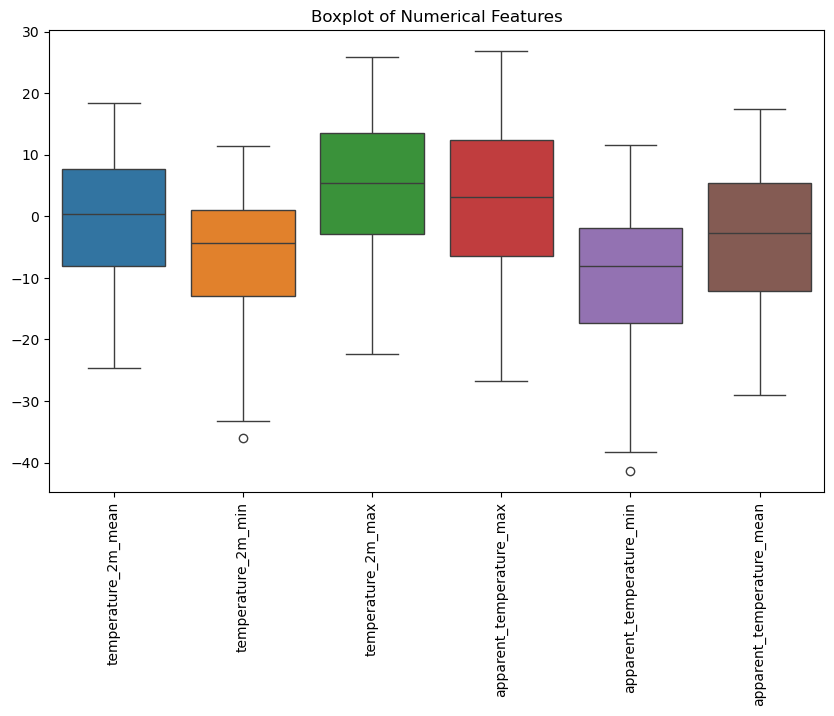

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.iloc[:,1:7])
plt.xticks(rotation=90)
plt.title("Boxplot of Temperature Features")
plt.show()